# Instruction

To install `pip install fasttext`,

first run `apt-get install build-essential -y`!

Before running this ipynb notebook,

first run `python download_fasttext.py`.

then, run `python reduce_dim.py cc.ko.300.bin cc.ko.100.bin 100`

# Install Nanum Font

```
apt-get install fonts-nanum*
apt-get install fontconfig
rm -rf ~/.cache/matplotlib/*
```

# Load fastText Model

In [17]:
import fasttext
import fasttext.util

from gensim import models

In [18]:
ft = fasttext.load_model('cc.ko.100.bin')

# Nearest Words

In [3]:
results = ft.get_nearest_neighbors("파이썬", k=10)
for d, w in results:
    print("%.3f: %s" % (d, w))

0.750: 자바스크립트
0.724: 프로그래밍
0.716: 텐서플로우
0.714: 레일스
0.701: 제이쿼리
0.689: Python
0.679: 정규표현식
0.674: 파이선
0.672: 리눅스
0.671: 파이썬을


In [4]:
results = ft.get_nearest_neighbors("게임", k=10)
for d, w in results:
    print("%.3f: %s" % (d, w))

0.762: 슈팅
0.725: 만화
0.723: 콘솔
0.721: VR
0.711: 위쳐
0.711: 농구
0.709: 라테일
0.708: 장르
0.708: 건슈팅
0.706: 턴제


In [5]:
results = ft.get_nearest_neighbors("이순신", k=10)
for d, w in results:
    print("%.3f: %s" % (d, w))

0.757: 이순신장군
0.713: 김시민
0.702: 곽재우
0.698: 행주대첩
0.695: 충무공
0.686: 이순신과
0.685: 이순신장군의
0.683: 이여송
0.677: 李純信
0.676: 율곡이이


In [6]:
results = ft.get_nearest_neighbors("과학", k=10)
for d, w in results:
    print("%.3f: %s" % (d, w))

0.795: 의학
0.782: 수학
0.778: 공학
0.769: 학문
0.750: 철학
0.726: 물리
0.726: 科學
0.719: 학술
0.717: 교육
0.711: 인문


# Get Nearest Word Vectors

In [11]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [8]:
def get_nearest_word_vectors(query_word: str, k: int = 10):
    results = ft.get_nearest_neighbors(query_word, k)
    word = [query_word]
    similarity = [1]
    word_vectors = [ft.get_word_vector(query_word)]
    for d, w in results:
        word.append(w)
        similarity.append(d)
        word_vectors.append(ft.get_word_vector(w))
    return {'word': word,
            'similarity': similarity,
            'word_vectors': word_vectors}


In [9]:
results = get_nearest_word_vectors("애플", k=20)

In [10]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(results["word_vectors"])

In [11]:
svd = TruncatedSVD(n_components=3)
svd_result = svd.fit_transform(results["word_vectors"])

In [12]:
print(pca.explained_variance_ratio_)
print(svd.explained_variance_ratio_)

[0.21812107 0.13263512 0.09805022]
[0.20108709 0.13291046 0.09813917]


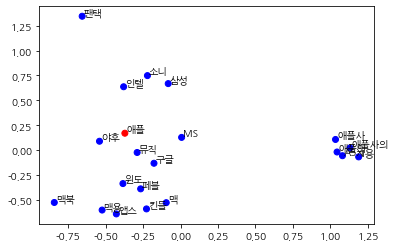

In [13]:
ax1, ax2 = 0, 1

plt.scatter(x=pca_result[:, ax1], y=pca_result[:, ax2], 
    c=['red' if i == 0 else 'blue' for i in range(len(pca_result))])
for x, y, s in zip(pca_result[:, ax1]+0.01, pca_result[:, ax2]+0.01, results["word"]):
    plt.text(x, y, s)

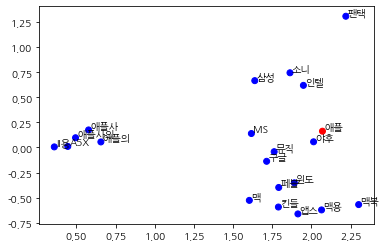

In [14]:
ax1, ax2 = 0, 1

plt.scatter(x=svd_result[:, ax1], y=svd_result[:, ax2], 
    c=['red' if i == 0 else 'blue' for i in range(len(svd_result))])
for x, y, s in zip(svd_result[:, ax1]+0.01, svd_result[:, ax2]+0.01, results["word"]):
    plt.text(x, y, s)

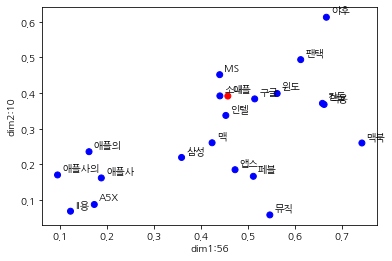

In [15]:
ax1, ax2 = np.argsort(svd.components_[0])[-1], np.argsort(svd.components_[0])[-2]

xs = [results['word_vectors'][i][ax1] for i in range(len(results['word_vectors']))]
ys = [results['word_vectors'][i][ax2] for i in range(len(results['word_vectors']))]

plt.scatter(x=xs, y=ys, c=['red' if i == 0 else 'blue' for i in range(len(svd_result))])
plt.xlabel("dim1:" + str(ax1))
plt.ylabel("dim2:" + str(ax2))
for x, y, s in zip(xs, ys, results["word"]):
    plt.text(x+0.01, y+0.01, s)

# Pandas

In [12]:
train_df = pd.read_csv("/opt/ml/dataset/train/train.csv")
train_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [33]:
import re
import random
from konlpy.tag import Okt

```
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
apt install default-jdk
pip install jpype1==0.7.0
pip install konlpy
```

In [6]:
tokenizer = Okt()

In [7]:
sentence = "안녕하세요 김상현입니다 반갑습니다 오늘은 날씨가 맑네요"
print(tokenizer.morphs(sentence))

['안녕하세요', '김상현', '입니다', '반갑습니다', '오늘', '은', '날씨', '가', '맑네요']


In [95]:
import re
import random

import fasttext
import fasttext.util
from konlpy.tag import Okt

ft = fasttext.load_model('cc.ko.100.bin')
tokenizer = Okt()

def get_nearest_word_vectors(query_word: str, k: int = 10):
    results = ft.get_nearest_neighbors(query_word, k)
    word = [query_word]
    similarity = [1]
    word_vectors = [ft.get_word_vector(query_word)]
    for d, w in results:
        word.append(w)
        similarity.append(d)
        word_vectors.append(ft.get_word_vector(w))
    return {'word': word,
            'similarity': similarity,
            'word_vectors': word_vectors}


def change_random_word(sentence: str, min_changes: int = 0, max_changes: int = 3, tokenizer = None):
    
    nouns  = tokenizer.nouns(sentence)
    
    num_changes = min(random.randint(min_changes, max_changes), len(nouns))
    cnt = 0
    trials = 0

    while cnt < num_changes or trials > 10:

        length = 0
        trials += 1

        while length < 2:
            choice = random.randint(0, len(nouns)-1)
            original_word = nouns[choice]
            length = len(original_word)

        start_idx = sentence.find(original_word)
        end_idx = start_idx + len(original_word)

        if start_idx == -1:
            continue

        k = 5
        results = get_nearest_word_vectors(original_word, k=k)

        for i in range(1, k+1):
            replacing_word = results['word'][i]
            tokenized = tokenizer.nouns(replacing_word)
            if len(tokenized) == 0:
                break
            replacing_word = tokenized[0]

            if len(original_word) < 2:
                break
            if original_word == replacing_word:
                continue
            if abs(len(replacing_word) - len(original_word)) > 2:
                continue
            if re.match(r'[^ㄱ-ㅣ가-힣]+', replacing_word):
                continue

            sentence = sentence[:start_idx] + replacing_word + sentence[end_idx:]
            cnt += 1
            # print("changed from", original_word, "to", replacing_word)
            break

    return sentence

In [94]:
for idx in range(30, 40):
    print(train_df['sentence'].iloc[idx])
    print(change_random_word(train_df['sentence'].iloc[idx], min_changes=1, max_changes=2, tokenizer=tokenizer))

미국 정부는 1942년 2월 24일 전 세계의 청취자를 대상으로 태평양 전쟁의 전쟁상황을 알리기 위한 방송인 미국의 소리(VOA, Voice of America)를 개국하였다.
미국 정부는 1942년 2월 24일 전 세계의 음량자를 대상으로 태평양 전쟁의 전쟁상황을 알리기 위한 방송인 미국의 소리(VOA, Voice of America)를 개국하였다.
이어 “향후 우리 창업벤처기업들이 세계가 주목하는 줌(Zoom)과 페이스북(Facebook)과 같은 글로벌 플랫폼 기업으로 성장하도록 지원하고 대한민국이 ‘벤처 4대강국’으로 자리매김하도록 최선을 다할 계획”이라고 밝혔다.
이어 “향후 우리 창업벤처기업들이 세계가 주목하는 줌(Zoom)과 페이스북(Facebook)과 같은 글로벌 플랫폼 기업으로 성장하도록 제공하고 경제이 ‘벤처 4대강국’으로 자리매김하도록 최선을 다할 계획”이라고 밝혔다.
양당이 모두 해체한 뒤 신당을 창당하는 것이 아닌 유신당이 해체 뒤 기존의 민주당에 합류하는 방식이기 때문에, 옛 모두의 당 시절 비례대표로 선출되어 두레당을 거쳐 유신당에 합류했던 참의원 의원 5명(오노 지로, 가와다 류헤이, 시바타 다쿠미, 데라타 스케시로, 마야마 유이치)은 국회법 제109조의 2의 규정에 의해 신당에 입당할 경우 의원직이 자동 박탈되기 때문에 유신당 해체와 함께 임기 만료 전까지 무소속 신분을 유지하게 되었다.
양당이 모두 해체한 뒤 신당을 창당하는 것이 아닌 유신당이 해체 뒤 기존의 민주당에 합류하는 방식이기 때문에, 옛 모두의 당 시절 비례대표로 선출되어 두레당을 거쳐 유신당에 합류했던 참의원 의원 5명(오노 지로, 가와다 류헤이, 시담맘 간, 데라타 스케시로, 마야마 유이치)은 국회법 제109조의 2의 규정에 의해 신당에 입당할 경우 의원직이 자동 박탈되기 때문에 유신당 해체와 함께 임기 만료 전까지 무소속 신분을 유지하게 되었다.
채리나는 이후 박용근을 생명의 은인으로 여기고 교제하다가 2016년 11월에 결혼하였다.
채리나는 직후 박용근을 영혼의